<a href="https://colab.research.google.com/github/Zarate73/Simulaci-n-/blob/main/Distribucion_de_tinas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

La empresa TIBASA (fabricante de tinas de baño) tiene asignado un camión especial
para el transporte de tinas terminadas. Dicho camión transporta diariamente 5 tinas.
El peso de cada tina sigue la siguiente distribución de probabilidad:

## Solución
* a) analiticamente


Para resolver este problema analíticamente, necesitamos calcular la probabilidad de que el peso total de las 5 tinas exceda una tonelada (1000 kg). Dado que el peso de cada tina sigue una distribución triangular, primero analizaremos esta distribución y luego determinaremos la probabilidad de que la suma de los pesos de las 5 tinas supere los 1000 kg.

### Paso 1: Entender la Distribución Triangular

Una distribución triangular está definida por tres parámetros:

* $a$ (extremo izquierdo): 190 kg
* $b$ (moda o centro): 210 kg
* $c$ (extremo derecho): 230 kg


La función de densidad de probabilidad (PDF) de una distribución triangular se define por:

$
f(x) =
\begin{cases}
\frac{2(x - a)}{(b - a)(c - a)}, & \text{para } a \leq x < b \\
\frac{2(c - x)}{(c - b)(c - a)}, & \text{para } b \leq x \leq c
\end{cases}
$

### Paso 2: Calcular la Media y la Varianza de la Distribución Triangular

Para una distribución triangular, la media ($\mu$) y la varianza ($\sigma^2$) se calculan como:

$$
\mu = \frac{a + b + c}{3}
$$

$$
\sigma^2 = \frac{a^2 + b^2 + c^2 - ab - ac - bc}{18}
$$

Sustituyendo los valores $a = 190$, $b = 210$, y $c = 230$:

$$
\mu = \frac{190 + 210 + 230}{3} = \frac{630}{3} = 210 \text{ kg}
$$

$$
\sigma^2 = \frac{190^2 + 210^2 + 230^2 - 190 \cdot 210 - 190 \cdot 230 - 210 \cdot 230}{18}
$$

$$
\sigma^2 = \frac{36100 + 44100 + 52900 - 39900 - 43700 - 48300}{18}
$$

$$
\sigma^2 = \frac{133100 - 131900}{18} = \frac{1200}{18} = 66.\overline{66} \text{ kg}^2
$$

$$
\sigma \approx 8.16 \text{ kg}
$$

### Paso 3: Distribución del Peso Total de las 5 Tinas

La media del peso total de las 5 tinas ($W$) será:

$$
\mu_W = 5 \cdot \mu = 5 \cdot 210 = 1050 \text{ kg}
$$

La varianza del peso total de las 5 tinas será:

$$
\sigma_W^2 = 5 \cdot \sigma^2 = 5 \cdot 66.\overline{66} \approx 333.33 \text{ kg}^2
$$

La desviación estándar del peso total será:

$$
\sigma_W = \sqrt{333.33} \approx 18.26 \text{ kg}
$$

### Paso 4: Probabilidad de que el Peso Total Exceda la Capacidad del Camión

Queremos calcular $P(W > 1000)$. Dado que $W$ es la suma de 5 variables independientes con distribución triangular, podemos aproximar la distribución de $W$ a una distribución normal $N(\mu_W, \sigma_W^2)$.

Usando la aproximación normal:

$$
Z = \frac{W - \mu_W}{\sigma_W}
$$

Calculamos el valor de $Z$ para $W = 1000$:

$$
Z = \frac{1000 - 1050}{18.26} \approx \frac{-50}{18.26} \approx -2.74
$$

Ahora, buscamos la probabilidad de que $Z$ sea mayor que -2.74 usando la tabla de la distribución normal estándar.

$$
P(Z > -2.74) \approx 0.9970
$$

Por lo tanto, la probabilidad de que el peso total de las tinas exceda la capacidad del camión es aproximadamente $0.9970$ o 99.7\%.





* b) Por simulación.

  Primero simulamos la distribución con un programa previamente realizado con la transformda inversa.


In [1]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def distriangular(a,b,c,n):
  C=[]
  d1=(b-a)
  d2=(c-a)
  d3=(c-b)

  for i in range(n):
    x=rd.random()
    if x<=0:
      U = 0
      C.append(U)
    elif 0 < x < d1/d2:
      U = np.sqrt(d1 * d2 * x) + a
      C.append(U)

    elif d1/d2<x<1:
      k=-(x-1)
      U=-np.sqrt(k*d2*d3)+c
      C.append(U)
    elif x>=1:
      U=1
      C.append(U)


  return C

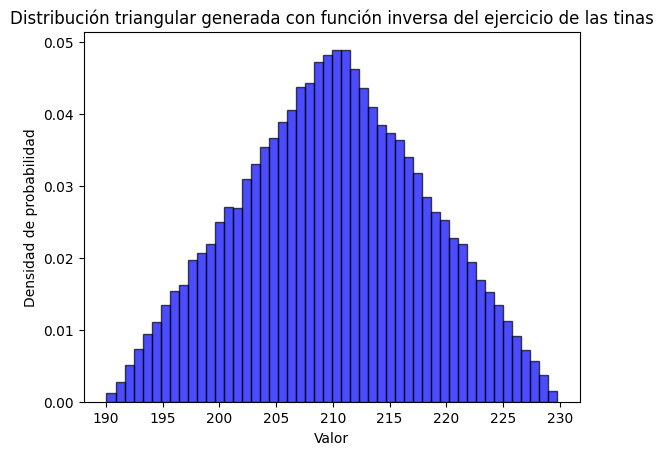

In [3]:
G=distriangular(190,210,230,90000)


#plt.hist(G, bins=50, density=True, alpha=0.6, color='g');

# Crear histograma para visualizar la distribución
plt.hist(G, bins=50, density=True, alpha=0.7, color='blue', edgecolor='black')

# Agregar etiquetas y título
plt.xlabel('Valor')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución triangular generada con función inversa del ejercicio de las tinas')

# Mostrar la gráfica
plt.show()

Como podemos observar generamos la distribucion que representan las tinas por lo que ahora podemos simular el experimento.


In [4]:
def tinas(capacidad,n,a,b,c):

  cont=0
  #k=0

  for i in range(n):
    x=distriangular(a,b,c,5)
    g=sum(x)
    if g<=capacidad:
      cont=+1

  prob=1-(cont/n)

  return prob

In [5]:
g=tinas(1000,260,190,210,230)
print("La probabilidad de que las tinas exceda la capacidad del camion es:",g)

La probabilidad de que las tinas exceda la capacidad del camion es: 0.9961538461538462


Por lo que la probabilidad de que las camionetas excedan la capacidad del camión es del 99.61%.

Si comparamos la probabilidad obtenida con la analítica difiere en 0.09\% por lo que se podría considerar "buena"

* Analice la conveniencia de adquirir un nuevo camión. Para tal propósito, suponga que
cada vez que la capacidad del camión es excedida una tina es enviada a través de otra
compañía a un costo de 200. También suponga que el costo promedio anual de un
nuevo camión es de 60, 000. Si se trabaja 5 días a la semana y 52 semanas al año,
¿cuál de las dos alternativas mencionadas es la más atractiva?
   * a) Resolver analíticamente.





Para determinar cuál de las dos alternativas (continuar con el camión actual y pagar 200 cada vez que se excede la capacidad, o adquirir un nuevo camión a un costo anual de 60,000) es más conveniente, debemos analizar el costo esperado asociado con cada alternativa.

### Paso 1: Calcular la Probabilidad de Exceder la Capacidad del Camión

Del análisis anterior, sabemos que la probabilidad de que el peso total de las 5 tinas exceda 1000 kg es aproximadamente 99.7\%.

### Paso 2: Calcular el Costo Anual Esperado de Continuar con el Camión Actual}

Primero, determinamos cuántos días se trabaja al año:

$$
5 \text{ días/semana} \times 52 \text{ semanas/año} = 260 \text{ días/año}
$$

La probabilidad de exceder la capacidad del camión en un día es 0.9970 (99.7\%).

El costo en un día en que se excede la capacidad es \$200. Por lo tanto, el costo diario esperado de exceder la capacidad del camión es:

$$
\text{Costo diario esperado} = 0.9970 \times 200 = 199.4 \text{ dólares/día}
$$

Ahora, el costo anual esperado de continuar con el camión actual es:

$$
\text{Costo anual esperado} =  199.4 \text{ dólares/día} \times 260 \text{ días/año} = 51,844 \text{ dólares/año}
$$

Al comparar los Costos


* $\textbf{Costo de continuar con el camión actual}: \$51,844/año$
* $\textbf{Costo de adquirir un nuevo camión}: \$60,000/año$



Es mucho más económico continuar con el camión actual y pagar \$200 cada vez que se excede la capacidad que adquirir un nuevo camión.

Por lo tanto, $\textbf{la alternativa más atractiva es continuar con el camión actual}$.













   * b) Resolver por simulación.

Retomando el programa anterior contamos el numero de veces que la suma de las 5 tinas es menor o igual a la capacidad del camion y se la restamos al número total de dias al año, es decir, 260.
Al resultado anterior lo multiplicamos por el costo de transporte (\$ 200 ).

#### Pseudocódigo

* Hacer :
  cont=0

* Para i desde el dia 1 hasta 260 (días hábiles)
  
  $x \sim triangular(190,210,230)$
* Si x <=Capacidad del camión:
  cont=cont+1

* Hacer:
  
  k=n-cont

* Hacer:
   
  cost=k*260
  
* Regresar cost

In [7]:
def tinas1(capacidad,n,a,b,c):

  cont=0
  k=0

  for i in range(n):
    x=distriangular(a,b,c,5)
    g=sum(x)
    #print(g)
    if g<=capacidad:
      cont=+1

  k=n-cont
  cost=k*200

  return  cost

In [8]:
h=tinas1(1000,260,190,210,230)
print("Es costo anual por transportar otra tina es:", h)

Es costo anual por transportar otra tina es: 51800
